In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
import nibabel as nib
import psutil
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid
from scipy import ndimage

In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"

In [4]:
flies = ['fly_087', 'fly_089', 'fly_094', 'fly_095', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101',
 'fly_105']

In [59]:
flies = ['fly_086', 'fly_095', 'fly_103', 'fly_104', 'fly_107']

In [66]:
flies = ['fly_086', 'fly_087', 'fly_089', 'fly_092', 'fly_093', 'fly_094', 'fly_095',
         'fly_096', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_103',
         'fly_104', 'fly_105', 'fly_106', 'fly_107', 'fly_110', 'fly_111']

In [3]:
flies = ['fly_087', 'fly_089', 'fly_092', 'fly_093', 'fly_094', 'fly_096',
         'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105', 'fly_106',
         'fly_110', 'fly_111']

In [3]:
flies = ['fly_087', 'fly_089', 'fly_092', 'fly_093', 'fly_094',
         'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105',
         'fly_111']

In [3]:
flies = ['fly_087', 'fly_089', 'fly_092', 'fly_093', 'fly_094',
         'fly_097', 'fly_098', 'fly_100', 'fly_101', 'fly_105']

In [10]:
brains = {}
for fly in flies:
    try:
        #file = os.path.join(dataset_path, fly, 'warp', 'glm_Y-applied-meanbrain.nii')
        file = os.path.join(dataset_path, fly, 'warp', 'glm_Z-applied-meanbrain.nii')
        brains[fly] = np.asarray(nib.load(file).get_data(), dtype='float32')/1
        print(fly)
    except:
        print(fly + '_failed')

fly_087
fly_089
fly_094
fly_095
fly_097
fly_098
fly_099
fly_100
fly_101
fly_105


In [10]:
file = os.path.join(dataset_path, fly, 'func_0', 'glm')
os.listdir(file)

['20201002_Z.nii',
 '20200930_score_Z.txt',
 '20200930_score_Y.txt',
 '20201002_score_Z.txt',
 '20201002_Y.nii',
 '20200930_Z.nii',
 '20200930_Y.nii',
 '20201002_score_Y.txt']

In [54]:
scores = {}
for fly in flies:
    print(fly)
    score_dir = os.path.join(dataset_path, fly, 'func_0', 'glm')
    try:
        with open(os.path.join(score_dir, '20201009_score_Z.txt'), 'r') as f:
            score = f.read().split(':')[-1]
            print(score)
            scores[fly] = score
    except:
        try:
            with open(os.path.join(score_dir, '20201002_score_Z.txt'), 'r') as f:
                score = f.read().split(':')[-1]
                print(score)
                scores[fly] = score
        except:
            pass

fly_086
0.14454378006490531
fly_087
0.42534780065871114
fly_089
0.40884227443028653
fly_092
0.5763730268723491
fly_093
0.28235669711665456
fly_094
0.3882730976143749
fly_095
0.3423566448624529
fly_096
0.32125404932924095
fly_097
0.5334407521925462
fly_098
0.2718927680964509
fly_099
0.5505771949863716
fly_100
0.37486000387678187
fly_101
0.39918204360286047
fly_103
0.528255617380667
fly_104
-4.440892098500626e-16
fly_105
0.4147684358951545
fly_106
0.005988607381586908
fly_107
0.30674704944148834
fly_110
0.363158921187827
fly_111
0.2985945916691325


In [55]:
scores

{'fly_086': '0.14454378006490531',
 'fly_087': '0.42534780065871114',
 'fly_089': '0.40884227443028653',
 'fly_092': '0.5763730268723491',
 'fly_093': '0.28235669711665456',
 'fly_094': '0.3882730976143749',
 'fly_095': '0.3423566448624529',
 'fly_096': '0.32125404932924095',
 'fly_097': '0.5334407521925462',
 'fly_098': '0.2718927680964509',
 'fly_099': '0.5505771949863716',
 'fly_100': '0.37486000387678187',
 'fly_101': '0.39918204360286047',
 'fly_103': '0.528255617380667',
 'fly_104': '-4.440892098500626e-16',
 'fly_105': '0.4147684358951545',
 'fly_106': '0.005988607381586908',
 'fly_107': '0.30674704944148834',
 'fly_110': '0.363158921187827',
 'fly_111': '0.2985945916691325'}

In [15]:
os.listdir('/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_086/func_0/glm')

['20201009_score_Z.txt',
 '20201009_score_Y.txt',
 '20201009_Y.nii',
 '20201009_Z.nii']

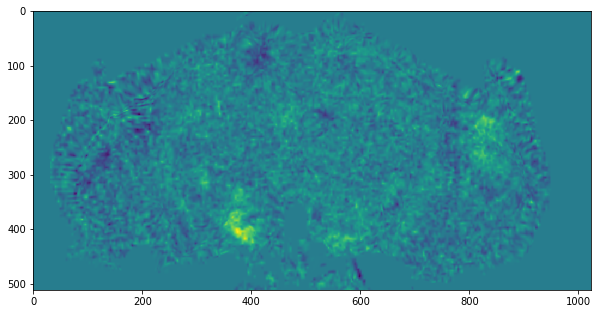

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(brains['fly_087'][:,:,100].T)

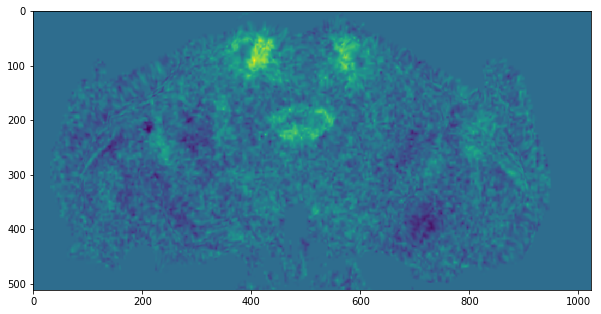

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(brains['fly_087'][:,:,100].T)

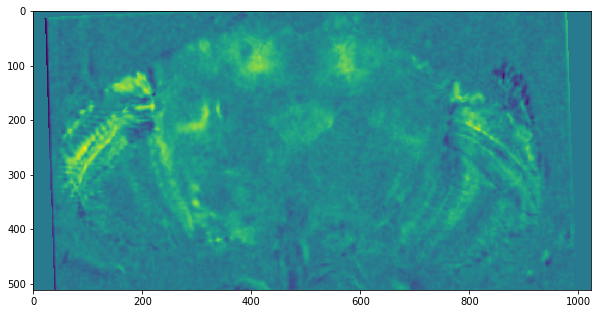

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(brains['fly_087'][:,:,100].T)

In [35]:
keys = [x for x in brains.keys() if '_m-' not in x]

In [131]:
#remove fly 102 - looks a little wonky and want 15 + 1mean to fit nicely in figs
keys.remove('fly_102-to-seed_syn_1_mean.nii.nii')

In [134]:
keys.sort()

In [138]:
# add meanbrain
brains['meanbrain'] = meanbrain

In [139]:
keys.insert(0,'meanbrain')

In [140]:
keys

['meanbrain',
 'fly_087-to-seed_syn_1_mean.nii.nii',
 'fly_089-to-seed_syn_1_mean.nii.nii',
 'fly_092-to-seed_syn_1_mean.nii.nii',
 'fly_093-to-seed_syn_1_mean.nii.nii',
 'fly_094-to-seed_syn_1_mean.nii.nii',
 'fly_096-to-seed_syn_1_mean.nii.nii',
 'fly_097-to-seed_syn_1_mean.nii.nii',
 'fly_098-to-seed_syn_1_mean.nii.nii',
 'fly_099-to-seed_syn_1_mean.nii.nii',
 'fly_100-to-seed_syn_1_mean.nii.nii',
 'fly_101-to-seed_syn_1_mean.nii.nii',
 'fly_105-to-seed_syn_1_mean.nii.nii',
 'fly_106-to-seed_syn_1_mean.nii.nii',
 'fly_110-to-seed_syn_1_mean.nii.nii',
 'fly_111-to-seed_syn_1_mean.nii.nii']

In [ ]:
FB = [405:575,110:260,102]
PB = [400:575,200:300,60]
Optic_lobe = [700:925,225:425,110]
VLP = [225:375,150:300,120]
MB = [325:500,60:180,150]

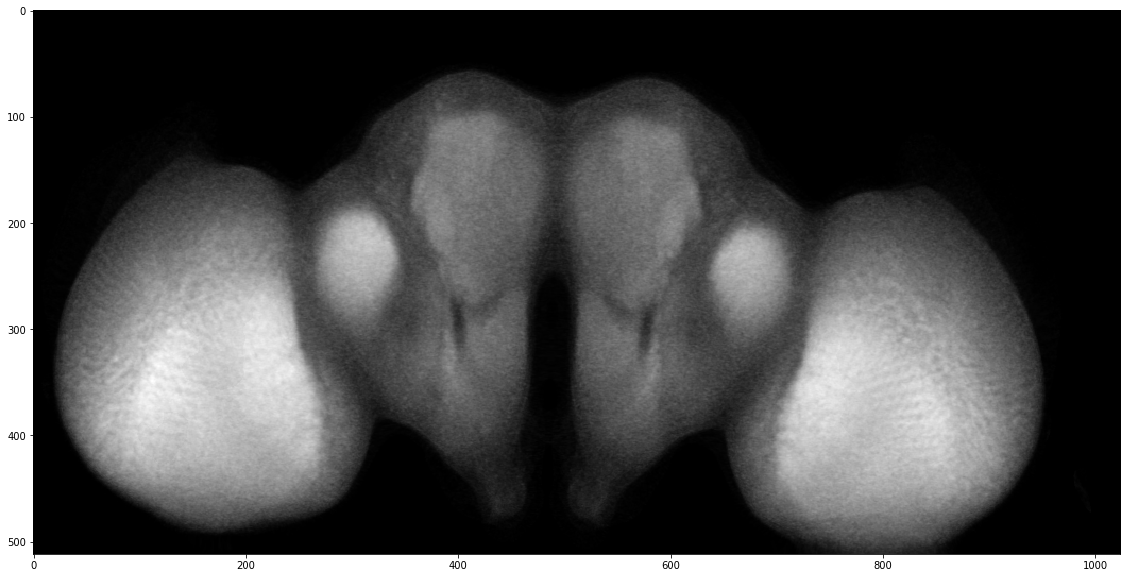

In [285]:
fig = plt.figure(figsize=(20,10))
plt.imshow(meanbrain[...,200].T,cmap='gray')
scalebar = ScaleBar(6.5*10**-7) # 1 pixel = 0.2 meter
#plt.gca().add_artist(scalebar)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [22]:
flies = ['fly_087',
 'fly_089',
 'fly_092',
 'fly_093',
 'fly_094',
 'fly_096',
 'fly_097',
 'fly_098',
 'fly_099',
 'fly_100',
 'fly_101',
 'fly_105',
 'fly_106',
 'fly_110',
 'fly_111']

In [5]:
to_avg = []
for fly in flies:
    to_avg.append(np.abs(brains[fly]/np.percentile(brains[fly],98)))

In [11]:
to_avg = []
for fly in flies:
    to_avg.append(np.abs(brains[fly]))

In [12]:
meanbrain = np.mean(np.asarray(to_avg),axis=0)

In [13]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201013_analysis/20201020_top10_glm_Z_mean.nii"

In [14]:
nib.Nifti1Image(meanbrain, np.eye(4)).to_filename(save_file)

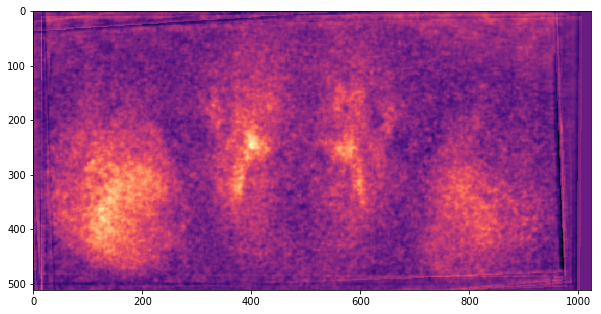

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain[:,:,200].T,cmap='magma')

(array([9.5574000e+04, 1.0374530e+06, 3.7528660e+06, 7.9127000e+06,
        9.6100456e+07, 1.9108885e+07, 5.0849730e+06, 1.0002190e+06,
        1.2125600e+05, 3.3460000e+03]),
 array([-0.24192569, -0.18528306, -0.12864044, -0.07199781, -0.01535519,
         0.04128744,  0.09793006,  0.15457269,  0.21121531,  0.26785794,
         0.32450056]),
 <a list of 10 Patch objects>)

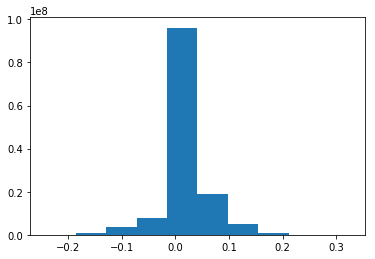

In [6]:
plt.hist(brains['fly_087'].flatten())

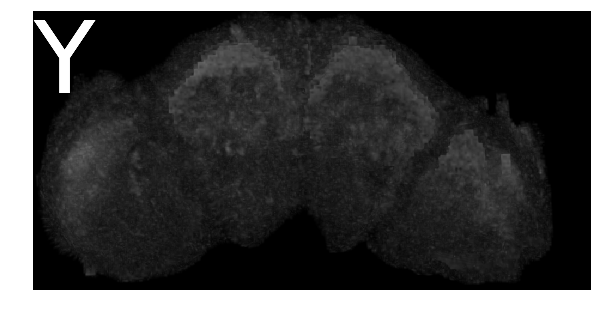

In [65]:
plt.figure(figsize=(10,10))
for fly in flies:
    plt.imshow(np.max(np.abs(brains[fly]),axis=-1).T,cmap='gray',vmin=0,vmax=.0001)
    plt.axis('off')
    plt.text(x=0,y=150,s='Y',color='white',fontsize=100)
    
    save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fname = os.path.join(save_path, timestr + '_Y-GLM_' + fly)
    plt.savefig(fname,dpi=300,bbox_inches='tight')

ValueError: Unknown format code 'f' for object of type 'str'

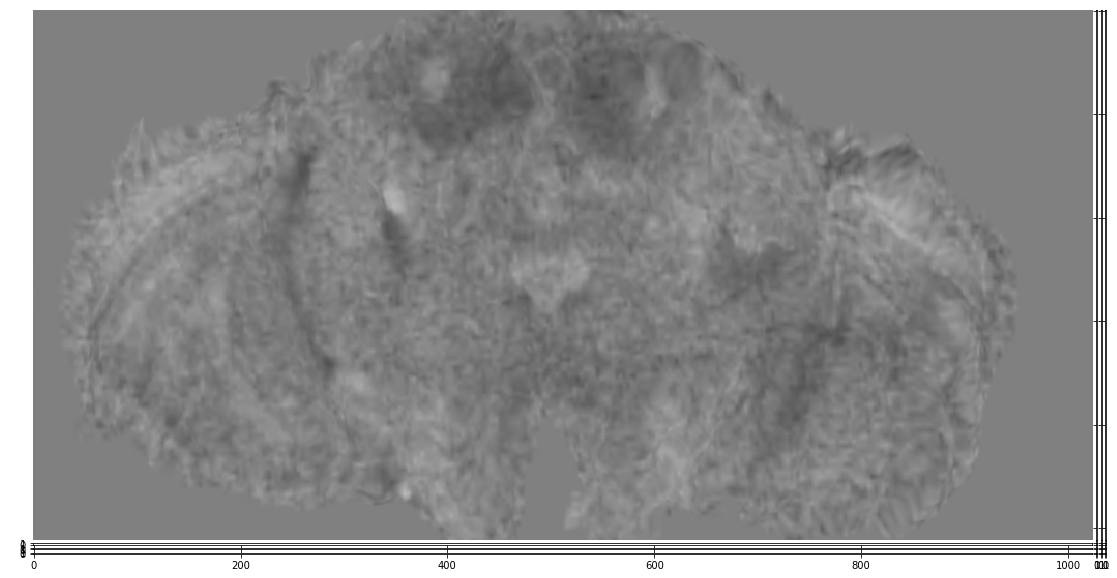

In [32]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(brains[fly][:,:,100].T,cmap='gray',vmin=-.0001,vmax=.0001)
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s=fly + ' {:.2f}'.format(scores[fly]),fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Z-GLM', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

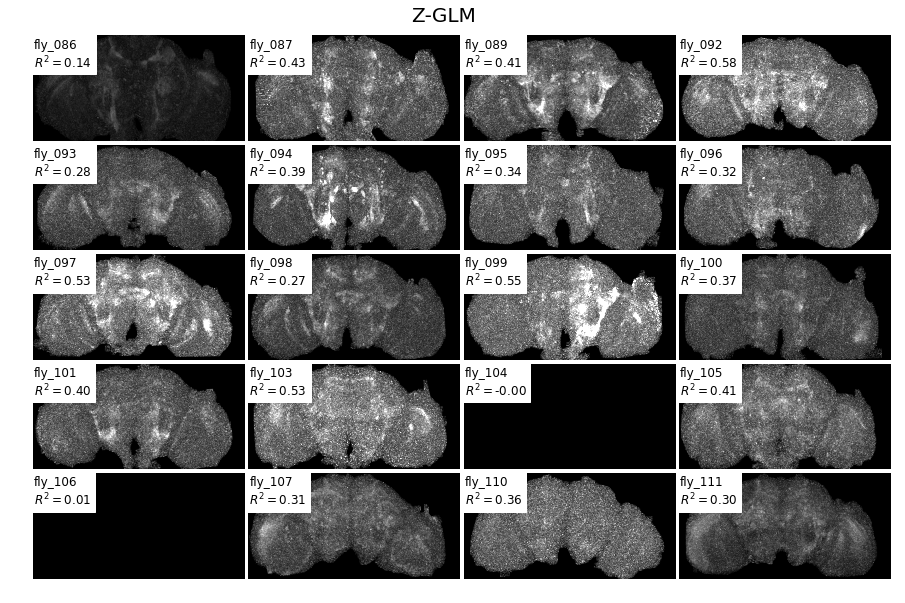

In [58]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(np.max(np.abs(brains[fly]),axis=-1).T,cmap='gray',vmin=0,vmax=.0001)
    grid[i].axis('off')
    grid[i].text(x=4,y=150,s=fly + '\n' + r'$R^2=$' + '{:.2f}'.format(float(scores[fly])),fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Z-GLM', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [42]:
print(r'$10^{2}$')

$10^{2}$


In [45]:
print(r'$\alpha > \beta$')

$\alpha > \beta$


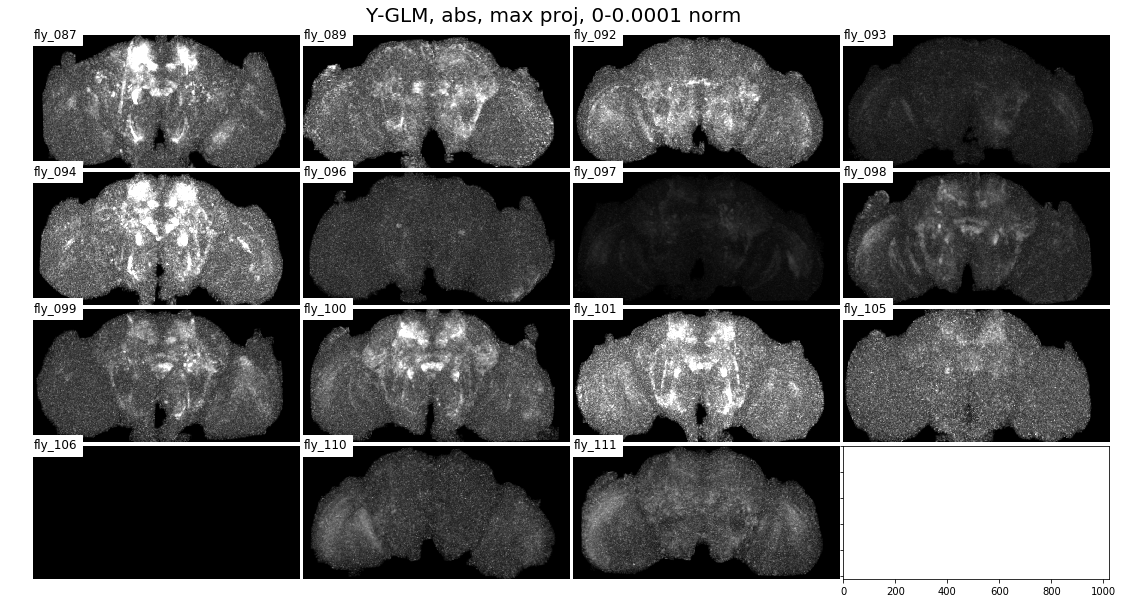

In [27]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(np.max(np.abs(brains[fly]),axis=-1).T,cmap='gray',vmin=0,vmax=.0001)
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s=fly,fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Y-GLM, abs, max proj, 0-0.0001 norm', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [11]:
np.percentile(brains[fly],98)

2.6213592573185427e-05

In [17]:
out = brains[fly]/2.6213592573185427e-05

(array([1.1000000e+01, 9.0000000e+00, 1.2000000e+01, 2.3000000e+01,
        3.8000000e+01, 7.0000000e+01, 1.4400000e+02, 2.8300000e+02,
        4.7500000e+02, 7.8800000e+02, 1.2410000e+03, 2.0300000e+03,
        3.2080000e+03, 5.1300000e+03, 8.2830000e+03, 1.3132000e+04,
        1.9674000e+04, 3.1101000e+04, 4.6718000e+04, 6.9708000e+04,
        1.0275400e+05, 1.4793600e+05, 2.0901300e+05, 2.9080500e+05,
        3.9228100e+05, 5.2372500e+05, 6.8526500e+05, 8.7522700e+05,
        1.1025580e+06, 1.3617200e+06, 1.6683420e+06, 2.0926660e+06,
        8.1450201e+07, 2.6396520e+06, 2.5681980e+06, 2.5738860e+06,
        2.5825170e+06, 2.5735850e+06, 2.5377080e+06, 2.4794060e+06,
        2.3996640e+06, 2.2957340e+06, 2.1770450e+06, 2.0372220e+06,
        1.8875920e+06, 1.7338170e+06, 1.5777860e+06, 1.4224900e+06,
        1.2745880e+06, 1.1305940e+06, 9.9894000e+05, 8.7701400e+05,
        7.6872400e+05, 6.6962600e+05, 5.8020000e+05, 5.0251200e+05,
        4.3235000e+05, 3.6949900e+05, 3.1863400e

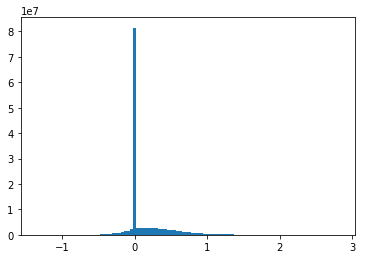

In [19]:
plt.hist(out.flatten(),bins=100)

In [ ]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(brains[fly][:,:,84].T/np.percentile(brains[fly],98),cmap='gray',vmin=-1.5,vmax=1.5)
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s=fly,fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Mushroom Body', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

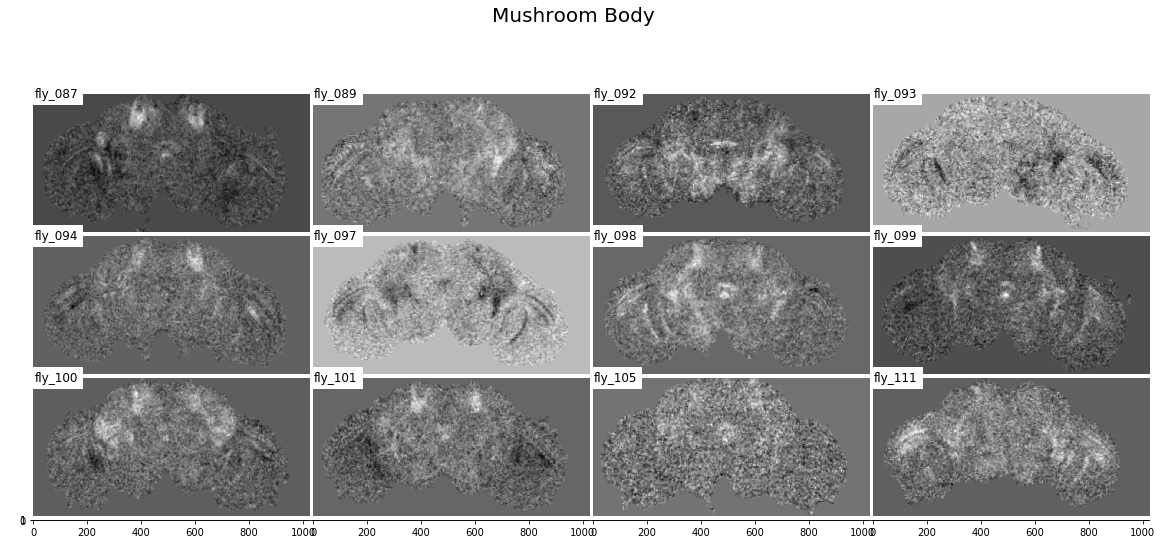

In [8]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(brains[fly][:,:,84].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s=fly,fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Mushroom Body', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

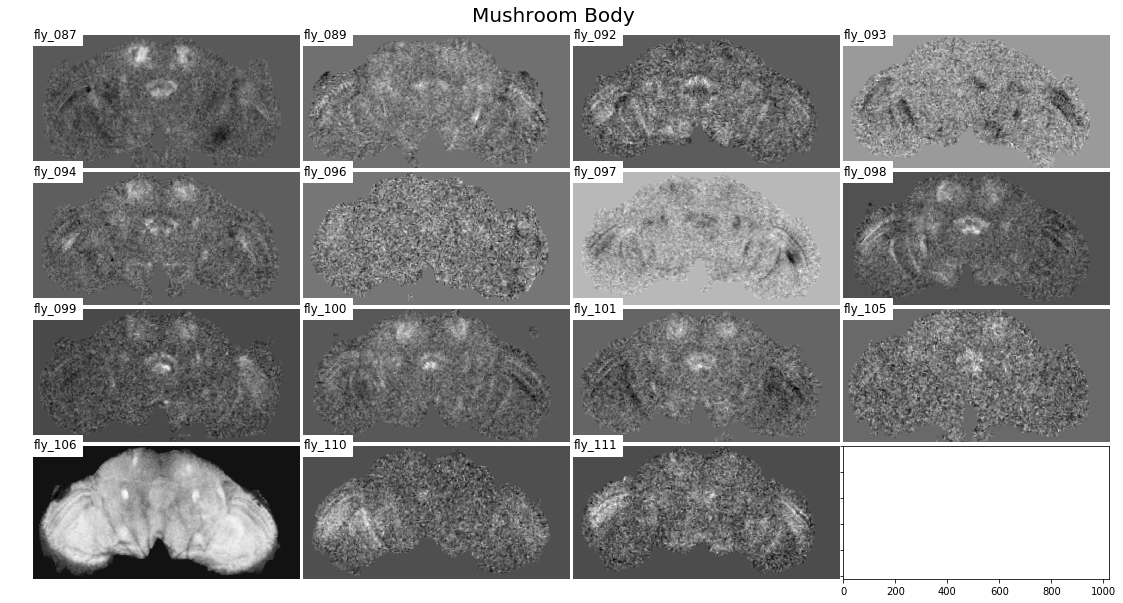

In [5]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(brains[fly][:,:,100].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s=fly,fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Mushroom Body', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

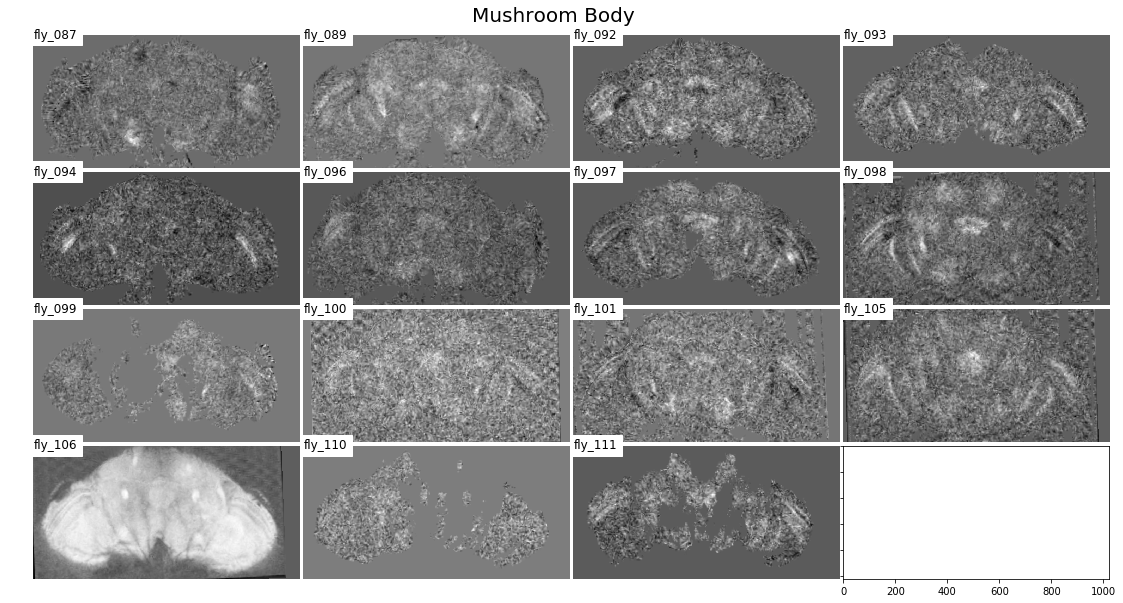

In [10]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(brains[fly][:,:,100].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s=fly,fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Mushroom Body', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

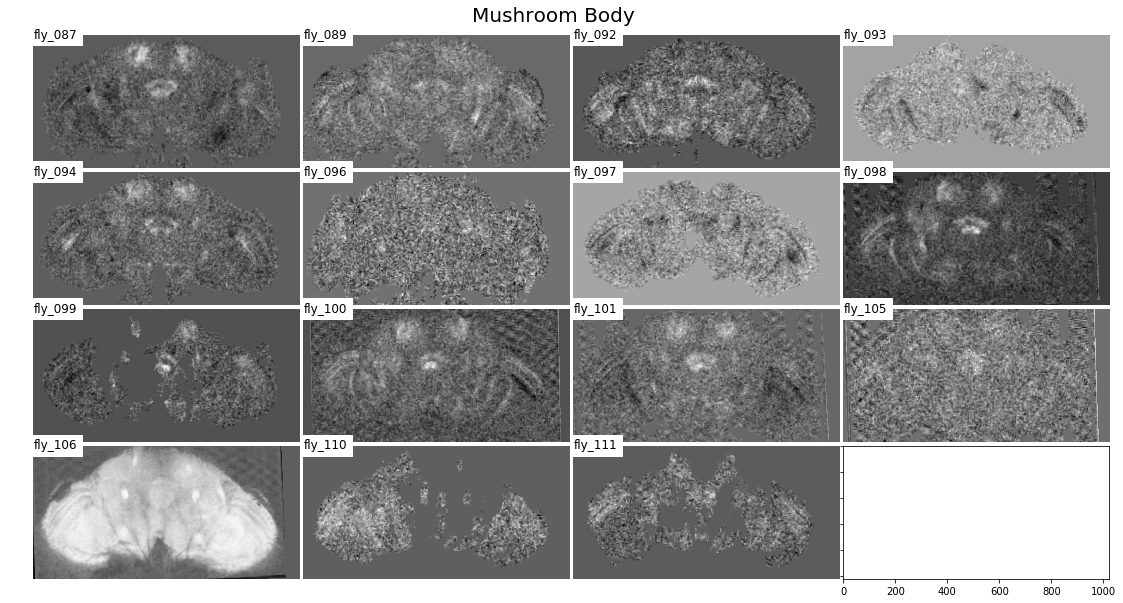

In [7]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(brains[fly][:,:,100].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s=fly,fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Mushroom Body', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

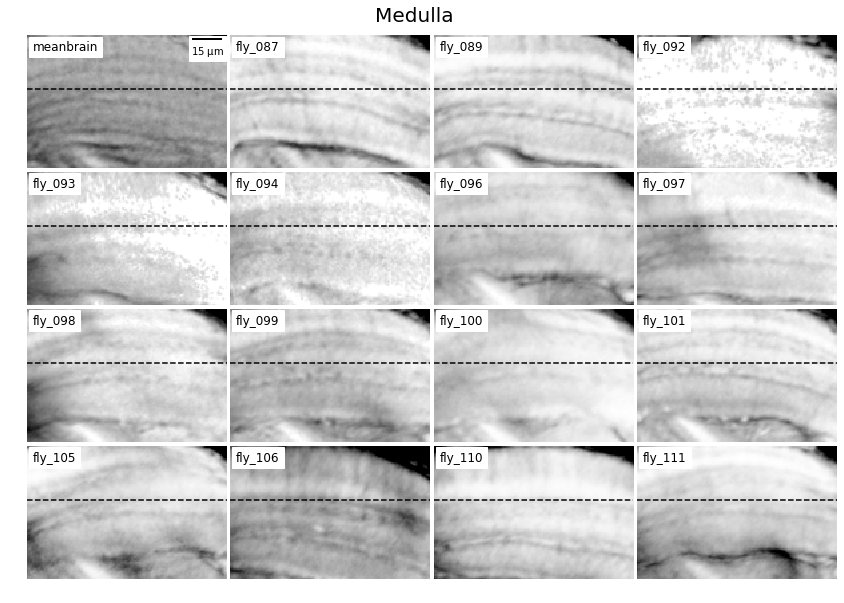

In [260]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,key in enumerate(keys):
    to_plot = ndimage.rotate(brains[key][...,110], -50)[230:330,775:925]
    grid[i].imshow(to_plot,cmap='gray',vmin=.7,vmax=1)
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s='{}'.format(key.split('-')[0]),fontsize=12,backgroundcolor='white')
    if i == 0:
        scalebar = ScaleBar(6.5*10**-7, location='upper right')
        grid[i].add_artist(scalebar)
    grid[i].axhline(40,linestyle='--',color='k')
plt.suptitle(x=.5, y=.92, t='Medulla', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

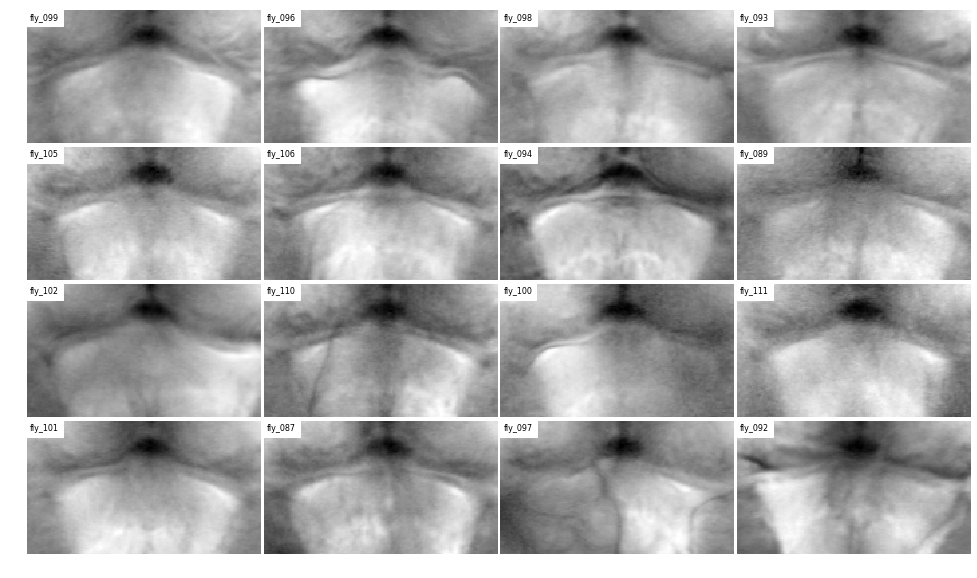

In [110]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)

for i,key in enumerate(keys):
    grid[i].imshow(brains[key][400:575,100:200,100].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=2,y=7,s='{}'.format(key.split('-')[0]),fontsize=8,backgroundcolor='white')